# 利用TensorFlow实现线性回归

输入$x$和输出$y$之间的关系是线性关系，即：
$$y = ax + b$$
假设 a = 1.25, b = 3.75

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/liuyanfang/anaconda3/envs/tensorflow1.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## 产生数据

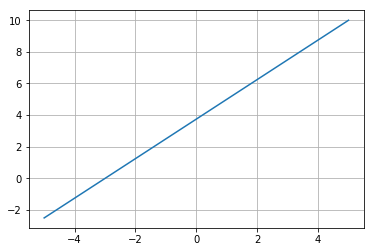

In [2]:
# 定义产生数据的函数
def linear(x):
    return 1.25 * x + 3.75
line_space = np.linspace(-5., 5., 1000)
plt.plot(line_space, linear(line_space))
plt.grid()

给数据增加噪声:$$y = 1.25x + 3.75 + N$$

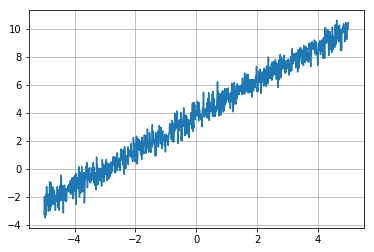

In [3]:
# 定义具有噪声的数据
def linear_with_n(x):
    return [linear(t) + np.random.normal(0, 0.5) for t in x]
plt.plot(line_space, linear_with_n(line_space))
plt.grid()

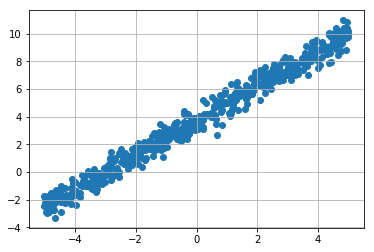

In [4]:
# 对噪声进行采样
sampled_x = np.random.choice(line_space, size=512)
sampled_y = linear_with_n(sampled_x)
plt.scatter(sampled_x, sampled_y)
plt.grid()

## 对数据进行预处理

* 分为训练集测试集
* 定义产生batch生成器

In [7]:
whole = np.transpose(np.array([sampled_x, sampled_y]))
whole1 = np.array([sampled_x, sampled_y])
print(whole1)
print(whole)
training_set = whole[:-64]
test_set = whole[-64:]

[[-0.44544545 -3.55855856 -1.10610611 ... -3.10810811 -1.0960961
   3.0980981 ]
 [ 3.21537655  0.07615677  2.20170771 ... -0.80848043  2.40891311
   6.99044331]]
[[-0.44544545  3.21537655]
 [-3.55855856  0.07615677]
 [-1.10610611  2.20170771]
 ...
 [-3.10810811 -0.80848043]
 [-1.0960961   2.40891311]
 [ 3.0980981   6.99044331]]


In [9]:
def gen_batch(data):
    for i in range(len(data) // 64):
        pos = 64 * i
        yield data[pos : pos + 64]

## 定义计算图

In [10]:
graph = tf.Graph()
with graph.as_default():
    # 定义placeholder
    x = tf.placeholder(shape=[None, 1], dtype=tf.float32, name='x')
    y = tf.placeholder(shape=[None, 1], dtype=tf.float32, name='y')
    # 定义变量
    a = tf.Variable(0.)
    b = tf.Variable(0.)
    # 定义模型
    linear_model = a * x + b
    # 定义损失函数
    loss = tf.reduce_mean(tf.square(linear_model - y))
    # 使用梯度下降优化
    opt = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

## 运行计算图

In [15]:
with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    step= 0
    for epoch in range(1000):
        for minibatch in gen_batch(training_set):
            _, l = sess.run([opt, loss], 
                            feed_dict={x: np.reshape(minibatch[:, 0], (-1, 1)), 
                                      y: np.reshape(minibatch[:, 1], (-1, 1))})
            step += 1
            if step % 100 == 0:
                print("Training Loss:{:>10.4f}".format(l))
    print("Training Finished")
    res, l = sess.run([(a, b), loss], 
                            feed_dict={x: np.reshape(test_set[:, 0], (-1, 1)), 
                                       y: np.reshape(test_set[:, 1], (-1, 1))})
    print("Testing Loss:{:>11.4f}".format(l))

Training Loss: 1500.7578
Training Loss: 1678.8748
Training Loss: 1061.5812
Training Loss: 1468.1287
Training Loss: 1074.5974
Training Loss:  980.0903
Training Loss:  952.9188
Training Loss:  869.4720
Training Loss:  952.1214
Training Loss:  704.8044
Training Loss:  900.5042
Training Loss:  747.4109
Training Loss:  702.7394
Training Loss:  694.8497
Training Loss:  677.4575
Training Loss:  704.2461
Training Loss:  569.1171
Training Loss:  669.4611
Training Loss:  590.6365
Training Loss:  567.4839
Training Loss:  561.2878
Training Loss:  570.6173
Training Loss:  571.9661
Training Loss:  478.8875
Training Loss:  536.3218
Training Loss:  485.5090
Training Loss:  472.3904
Training Loss:  466.3891
Training Loss:  486.5052
Training Loss:  477.7056
Training Loss:  404.3805
Training Loss:  441.6877
Training Loss:  403.9370
Training Loss:  396.0216
Training Loss:  390.5651
Training Loss:  414.8603
Training Loss:  402.7065
Training Loss:  340.8109
Training Loss:  367.8346
Training Loss:  337.5155


Training Loss:   13.4614
Training Loss:   17.6093
Training Loss:   20.9886
Training Loss:   14.6056
Training Loss:   13.1043
Training Loss:   11.2270
Training Loss:   11.7243
Training Loss:   13.4619
Training Loss:   17.6063
Training Loss:   20.9872
Training Loss:   14.6069
Training Loss:   13.1049
Training Loss:   11.2282
Training Loss:   11.7247
Training Loss:   13.4624
Training Loss:   17.6036
Training Loss:   20.9859
Training Loss:   14.6080
Training Loss:   13.1055
Training Loss:   11.2292
Training Loss:   11.7250
Training Loss:   13.4629
Training Loss:   17.6012
Training Loss:   20.9847
Training Loss:   14.6091
Training Loss:   13.1060
Training Loss:   11.2302
Training Loss:   11.7253
Training Loss:   13.4633
Training Loss:   17.5989
Training Loss:   20.9836
Training Loss:   14.6101
Training Loss:   13.1065
Training Loss:   11.2311
Training Loss:   11.7255
Training Loss:   13.4637
Training Loss:   17.5969
Training Loss:   20.9826
Training Loss:   14.6110
Training Loss:   13.1069


Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680


Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206


Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285


Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752


Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752


Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407


Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407


Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117


Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723


Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752


Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117


Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285


Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206
Training Loss:   13.1117
Training Loss:   11.2407
Training Loss:   11.7285
Training Loss:   13.4680
Training Loss:   17.5752
Training Loss:   20.9723
Training Loss:   14.6206


In [16]:
res

(1.2553856, 3.7446792)

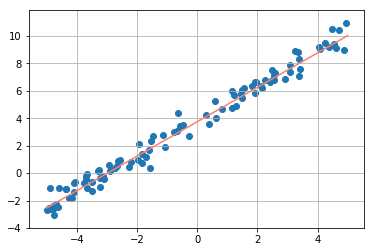

In [17]:
def pre(x, res):
    return x * res[0] + res[1]
plt.plot(line_space, pre(line_space, res),'salmon')
plt.scatter(sampled_x[:100], sampled_y[:100])
plt.grid()